In [104]:
#importing necessary libraries..
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d

In [105]:
#loading training data..

dfX = pd.read_csv("/Users/sidharthagarwal/Desktop/assignments/ml774/data/q1/linearX.csv")
dfY = pd.read_csv("/Users/sidharthagarwal/Desktop/assignments/ml774/data/q1/linearY.csv")

X = dfX.to_numpy()
Y = dfY.to_numpy()

# adding intercept in X
X = np.append(X,np.ones(X.shape),axis = 1)

# Note: X is (num_examples*num_features)
print(X.shape)
print(Y.shape)

(99, 2)
(99, 1)


In [106]:
# normalization of input
mean = np.mean(X[:,0])
std  = np.std(X[:,0])

X[:,0] = X[:,0]-mean
X[:,0] = X[:,0]/std

print("Mean: " + str(mean))
print("STD: "+str(std))

Mean: 8.05151515151515
STD: 1.728627857571563


In [107]:
# learning parameter and some more parameters initialization
alpha = 0.1
epsilon = 0.0000001
max_iter = 10000
theta = np.zeros((X.shape[1],1))

cost_list = []
theta_list = [theta]

draw_3d = False   # otherwise plot the scatter plot..

In [108]:
# helper functions to compute cost, calculate the gradient and train the model..
# note that np.dot gives amtrix multiplication for 2d arrays..

def cost(X,Y,theta):
    temp = np.dot(X,theta)
    temp = (Y - temp)**2
    this_cost = np.sum(temp)/(2*X.shape[0])
    return this_cost

def cost_grad_update(X,Y,theta,alpha):
    temp = np.dot(X,theta)
    temp = Y - temp
    theta = theta + (alpha*np.dot(X.transpose(),temp))/(X.shape[0])
    return theta

def train(X,Y,theta):
    iteration = 0
    finished = False

    while(not finished):
        curr_cost = cost(X,Y,theta)
        theta = cost_grad_update(X,Y,theta,alpha)

        finished = finished | (iteration>=max_iter)
        if(iteration>0):
            finished = finished | (abs(curr_cost - cost_list[-1])<epsilon)

        cost_list.append(curr_cost)
        theta_list.append(theta)

        if iteration%10==0:
            if draw_3d:
                ax.scatter3D(theta[0],theta[1],curr_cost)
            else:
                ax.scatter(theta[0],theta[1],marker='x')
        #plt.pause(0.2)
        iteration += 1
    
    if draw_3d:
        plt.savefig('../plots/1_c.png')
    else:
        plt.savefig('../plots/1_d_'+str(alpha)+'.png')
    #plt.show()
    
    print("Learning rate: "+str(alpha))
    print("Iterations taken: "+str(iteration))
    print("Epsilon for cost used: "+str(epsilon))
    print("Final Parameters: "+str(theta))
    return theta

Learning rate: 0.1
Iterations taken: 68
Epsilon for cost used: 1e-07
Final Parameters: [[0.00135689]
 [0.99586319]]


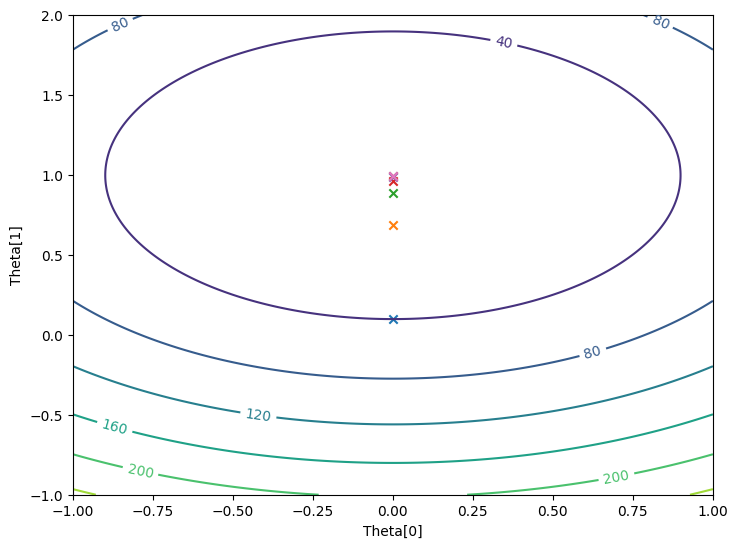

In [109]:
# Initialization for contour and 3d plots

# initalize x1 and x2 based on the range of theta's finally calculated

if draw_3d:
    x1 = np.linspace(-0.01, 0.01, 100)
    y1 = np.linspace(-0.75, 1.5, 100)
else:
    x1 = np.linspace(-1, 1, 200)
    y1 = np.linspace(-1, 2, 200)

Xg,Yg = np.meshgrid(x1,y1)

# Zg contains the value of cost for theta = (Xg[i][j],Yg[i][j])
Zg = []

for i in range(Xg.shape[0]):
    Zg.append([])
    for j in range(Xg.shape[1]):
        Zg[i].append(cost(X,Y,np.array([Xg[i][j],Yg[i][j]])))

Zg = np.array(Zg)

if draw_3d:
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(Xg,Yg,Zg,color='blue',linewidths=0.3)
    ax.view_init(30, 60)
    ax.set_zlabel('Cost')
else:
    f_scatter = plt.figure(2)
    ax = f_scatter.add_axes([0.2,0.2,1,1])
    cp = ax.contour(Xg,Yg,Zg)
    plt.clabel(cp,inline=1,fontsize = 10)

ax.set_xlabel('Theta[0]')
ax.set_ylabel('Theta[1]')

theta = train(X,Y,theta)

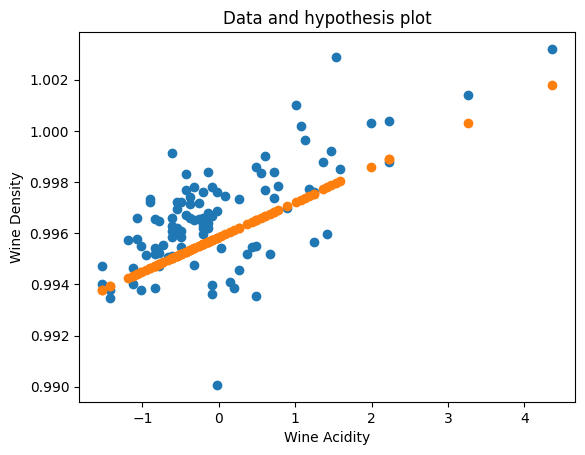

In [110]:
# 2d plot for data and hypothesis
plt.figure()
predictions = np.dot(X,theta)
plt.scatter(X[:,0],Y,label = "Ground Truth")
plt.scatter(X[:,0],predictions,label = "Predictions")
plt.title("Data and hypothesis plot")
plt.xlabel("Wine Acidity")
plt.ylabel("Wine Density")
#plt.show()
plt.savefig('../plots/1_b.png')

In [97]:
# demo running to check the dimensionality and correctness of various operations in numpy.

#check1 = np.array([[1,2],[2,3]])
#check2 = np.array([[0],[-1]])
#print(check1.shape)
#print(check2.shape)
#print(np.dot(check1,check2))